## 非线性回归案例

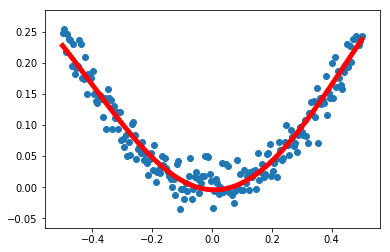

In [2]:
# 非线性回归模型案例
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# 在jupyter中绘图是要加这一句话
%matplotlib inline
# mac os中要加这句话才能运行matplotlib
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 使用 numpy 生成200个随机点
# linspace(num1,num2,count)函数表示在num1到num2的范围内生成count个等间距的随机数(均匀分布)
# 再给这个生成的一维的随机数增加一个维度，变成二维的矩阵(200行1列)
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]  
# 再做一些噪声数据, 范围从0到0.02, 形状和x_data一样
noise = np.random.normal(0, 0.02, x_data.shape)
# 标签值
y_data = np.square(x_data) + noise

# 定义两个placeholder, 定义其数据类型和形状, 这里的意思就是 行不确定，1列的形状
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 输入层一个神经元，隐藏层10个，输出层1个
# 首先定义神经网络的输入层(1)和中间层(10)之间的权重矩阵
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
# 激活函数用双曲正切函数tanh
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神经网络的中间层与输出层之间的权重矩阵
Weight_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 还是用二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 训练还是使用梯度下降 去 最小化这个loss
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        # 训练的时候要向 placeholder 传入值
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    # 绘图
    plt.figure()
    plt.scatter(x_data, y_data) # 散点图，横坐标x_data,纵坐标y_data
    plt.plot(x_data, prediction_value, 'r-', lw=5)  # 折线图 r表示红色 - 表示实线 lw表示宽度
    plt.show()
    

## 线性分类器实现手写体数字识别

In [4]:


# 手写数字识别案例(线性分类器)
from tensorflow.examples.tutorials.mnist import input_data

# 载入数据集。第一个参数是路径名，第二个是采用的编码
mnist = input_data.read_data_sets("/Users/yuejinxiong/MNIST_data",one_hot=True)

# 每个批次的大小(每次放入100张图片去训练)
batch_size = 100
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义两个placeholder
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

# 创建一个简单的神经网络--只有输入和输出层，没有隐藏层
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x, W)+b)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 梯度下降
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 这里求预测的正确数、结果存在一个布尔型的列表中
# equal(num1, num2)比较两个参数的大小是否一样,返回值为True或False
# arg_max() 求y(一维张量)这个结果最大的值的索引位置(如果标签值和预测值最大的值在同一个位置，则说明该条正确) 1表示按行查找
correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(prediction, 1))

# 求准确率, cast()将布尔类型的列表中的元素转成32位的浮点类型,然后再求一个平均值(true=1.0 false=0)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    # 所有数据迭代21次
    for epoch in range(21):
        # 一次迭代中迭代计算好的数量个批次
        for batch in range(n_batch):
            # 获取100个批次保存在里面,数据保存在batch_xs中，标签保存在batchys中
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
        # 训练一个周期后,可以查看其准确率的变化
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("第"+str(epoch+1)+"次迭代的准确率: "+str(acc))

Extracting /Users/yuejinxiong/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/yuejinxiong/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/yuejinxiong/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/yuejinxiong/MNIST_data/t10k-labels-idx1-ubyte.gz
第1次迭代的准确率: 0.7404
第2次迭代的准确率: 0.8322
第3次迭代的准确率: 0.8589
第4次迭代的准确率: 0.8708
第5次迭代的准确率: 0.878
第6次迭代的准确率: 0.8818
第7次迭代的准确率: 0.8855
第8次迭代的准确率: 0.8877
第9次迭代的准确率: 0.8915
第10次迭代的准确率: 0.8941
第11次迭代的准确率: 0.8963
第12次迭代的准确率: 0.8973
第13次迭代的准确率: 0.8985
第14次迭代的准确率: 0.8994
第15次迭代的准确率: 0.9007
第16次迭代的准确率: 0.9016
第17次迭代的准确率: 0.9032
第18次迭代的准确率: 0.9038
第19次迭代的准确率: 0.9044
第20次迭代的准确率: 0.9052
第21次迭代的准确率: 0.906


## 改进手写体识别代码，提高准确率

In [4]:
# 手写数字识别案例(线性分类器)
from tensorflow.examples.tutorials.mnist import input_data

# 载入数据集。第一个参数是路径名，第二个是采用的编码
mnist = input_data.read_data_sets("/Users/yuejinxiong/MNIST_data",one_hot=True)

# 每个批次的大小(每次放入100张图片去训练)
batch_size = 100
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义两个placeholder
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

# 创建一个简单的神经网络--只有输入和输出层，没有隐藏层（改进后增加隐藏层）
# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# prediction = tf.nn.softmax(tf.matmul(x, W)+b)

# 增加了隐藏层之后,参数变多了,更加难以收敛,如果想得到好的结果,必须要迭代很多次
# 隐藏层的神经元个数最好是2^n个

# 输入层与隐藏层之间的权重和偏置的初始化 隐藏层有5个神经元  用截断的正态分布来初始化,其标准差是0.1
Weight_L1 = tf.Variable(tf.truncated_normal([784, 512],stddev=0.1))
# 偏置值初始化为0.1
biases_L1 = tf.Variable(tf.zeros([1, 512])+0.1)
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 隐藏层和输出层之间权重和偏置的初始化
Weight_L2 = tf.Variable(tf.random_normal([512, 10]))
biases_L2 = tf.Variable(tf.random_normal([1, 10]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
prediction = tf.nn.softmax(Wx_plus_b_L2)

# 二次代价函数
#loss = tf.reduce_mean(tf.square(y-prediction))
# 现在改为对数似然函数来优化
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=prediction))
# 梯度下降
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 这里求预测的正确数、结果存在一个布尔型的列表中
# equal(num1, num2)比较两个参数的大小是否一样,返回值为True或False
# arg_max() 求y(一维张量)这个结果最大的值的索引位置(如果标签值和预测值最大的值在同一个位置，则说明该条正确) 1表示按行查找
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))

# 求准确率, cast()将布尔类型的列表中的元素转成32位的浮点类型,然后再求一个平均值(true=1.0 false=0)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    # 所有数据迭代21次
    for epoch in range(101):
        # 一次迭代中迭代计算好的数量个批次
        for batch in range(n_batch):
            # 获取100个批次保存在里面,数据保存在batch_xs中，标签保存在batchys中
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
        # 训练一个周期后,可以查看其准确率的变化
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("第"+str(epoch+1)+"次迭代的准确率: "+str(acc))

Extracting /Users/yuejinxiong/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/yuejinxiong/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/yuejinxiong/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/yuejinxiong/MNIST_data/t10k-labels-idx1-ubyte.gz
第1次迭代的准确率: 0.812
第2次迭代的准确率: 0.8295
第3次迭代的准确率: 0.9262
第4次迭代的准确率: 0.9358
第5次迭代的准确率: 0.9421
第6次迭代的准确率: 0.9439
第7次迭代的准确率: 0.9475
第8次迭代的准确率: 0.9506
第9次迭代的准确率: 0.9529
第10次迭代的准确率: 0.9565
第11次迭代的准确率: 0.955
第12次迭代的准确率: 0.9555
第13次迭代的准确率: 0.9607
第14次迭代的准确率: 0.9589
第15次迭代的准确率: 0.9622
第16次迭代的准确率: 0.9635
第17次迭代的准确率: 0.9623
第18次迭代的准确率: 0.9624
第19次迭代的准确率: 0.9624
第20次迭代的准确率: 0.9657
第21次迭代的准确率: 0.9663
第22次迭代的准确率: 0.9662
第23次迭代的准确率: 0.9657
第24次迭代的准确率: 0.9672
第25次迭代的准确率: 0.9679
第26次迭代的准确率: 0.9676
第27次迭代的准确率: 0.9679
第28次迭代的准确率: 0.9681
第29次迭代的准确率: 0.9685
第30次迭代的准确率: 0.9674
第31次迭代的准确率: 0.9686
第32次迭代的准确率: 0.9684
第33次迭代的准确率: 0.9689
第34次迭代的准确率: 0.9686
第35次迭代的准确率: 0.9686
第36次迭代的准确率: 0.9689
第37次迭代的准确率: 0.9681
第38次迭代的准确率: 0.9684
第39次迭代的准确率: 0.9681
